# <font color='red'>Backpropagation</font>


In this assignment, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 

Please submit the final Colab notebook in the classroom ONLY after you have verified your code using the grader function/cell.




## <font color='red'>Loading data </font>

In [65]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

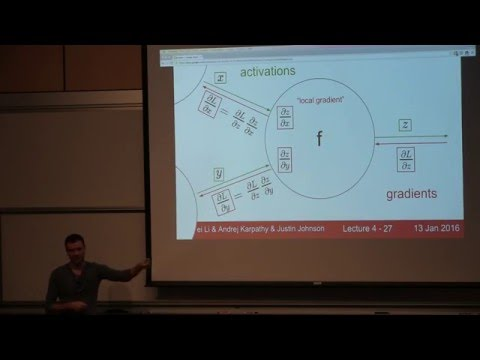

In [66]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [67]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the coexpde to compute the sigmoid value of z and return that value 
    loss = 1/(1+np.exp(-z))
    return loss

In [68]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [69]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
         


        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        
        part_2 = np.tanh(part_1 + w[6])
        
        temp1 = np.sin(w[2]*x[2])
        temp2 = (w[3]*x[3] + w[4]*x[4])
        temp3 = temp1 * temp2
        temp4 = temp3 + w[7]
        part_3 = sigmoid(temp4)


        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        temp5 = part_3 * w[8]
        yhat = part_2 + temp5

        LOSS = pow((y-(part_2 + part_3 * w[8])), 2)
        dy_pred = -2*(y-yhat) #wrt yhat

        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = LOSS
        forward_dict['dy_pred'] = dy_pred
        
        return forward_dict

In [70]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w= np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [71]:
import math
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    
    dw1=forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))*forward_dict["exp"]*2*((w[0]*x[0])+(w[1]*x[1]))*x[0]
    dw2=forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))*forward_dict["exp"]*2*((w[0]*x[0])+(w[1]*x[1]))*x[1]
    dw3=forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*((w[3]*x[3])+(w[4]*x[4]))*np.cos(x[2]*w[2])*x[2]
    dw4=forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*np.sin(x[2]*w[2])*x[3]
    dw5=forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*np.sin(x[2]*w[2])*x[4]
    dw6 =forward_dict['dy_pred']*(1-(pow(forward_dict['tanh'],2)))*forward_dict["exp"]
    dw7 = forward_dict['dy_pred']*(1-(pow(forward_dict['tanh'],2)))
    dw8 = forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]
    dw9 = forward_dict['dy_pred']*forward_dict['sigmoid']
        
    
    backward_dict={}
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    backward_dict['dw1'] = dw1
    backward_dict['dw2'] = dw2
    backward_dict['dw3'] = dw3
    backward_dict['dw4'] = dw4
    backward_dict['dw5'] = dw5
    backward_dict['dw6'] = dw6
    backward_dict['dw7'] = dw7
    backward_dict['dw8'] = dw8
    backward_dict['dw9'] = dw9
    
    return backward_dict

In [72]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [73]:
def gradient_checking(x,y,weight,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,weight)
    backward_dict=backward_propagation(x,y,weight,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    approx_gradients_list=[]
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    
    for i in range(len(weight)):
        w = np.ones(9) * 0.1
        w[i] = weight[i] + eps
        fwd = forward_propagation(x, y, w)
        loss = fwd['loss']
        w[i] = weight[i] - 2*eps
        fwd1 = forward_propagation(x, y, w)
        loss1 = fwd1['loss']
        apx = (loss-loss1)/(2*eps)
        approx_gradients_list.append(apx)
    
    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value
    

In [74]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=1e-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-0.5382508  -0.92967994 -1.00083254 -0.9967188  -0.99671675 -0.08053786
 -0.05802342 -0.82268298 -0.18536207]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

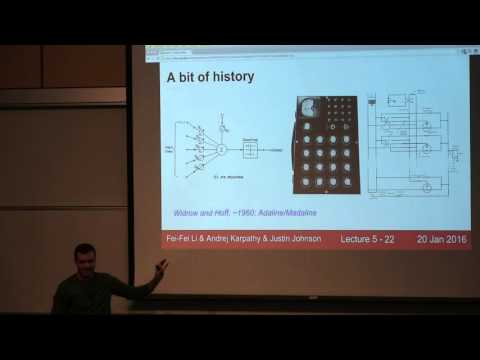

In [75]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [76]:
from sklearn.metrics import mean_squared_error


def vanilla_update(x, y, w, eta, epochs):
    loss_val=[]
    epochs_list = []
    for epoch in range(epochs):
      epochs_list.append(epoch)
      y_pred=[]
      for i in range(len(x)):
        forward_dict=forward_propagation(X[i], y[i], w)
        y_pred.append(forward_dict['dy_pred'])
        backward_dict=backward_propagation(X[i],y, w,forward_dict)
        w[0]=w[0]-eta*backward_dict["dw1"]
        w[1]=w[1]-eta*backward_dict["dw2"]
        w[2]=w[2]-eta*backward_dict["dw3"]
        w[3]=w[3]-eta*backward_dict["dw4"]
        w[4]=w[4]-eta*backward_dict["dw5"]
        w[5]=w[5]-eta*backward_dict["dw6"]
        w[6]=w[6]-eta*backward_dict["dw7"]
        w[7]=w[7]-eta*backward_dict["dw8"]
        w[8]=w[8]-eta*backward_dict["dw9"]
      loss=mean_squared_error(y,y_pred) 
      loss_val .append(loss)
    return loss_val, epochs_list

In [77]:

eta_vanilla=.001
mu, sigma = 0, 0.01 # mean and standard deviation
w_vanilla = np.random.normal(mu, sigma, 9) # weight intialization
epochs = 20
loss_vanilla, epochlist_vanilla = vanilla_update(X, y, w_vanilla, eta_vanilla, epochs)

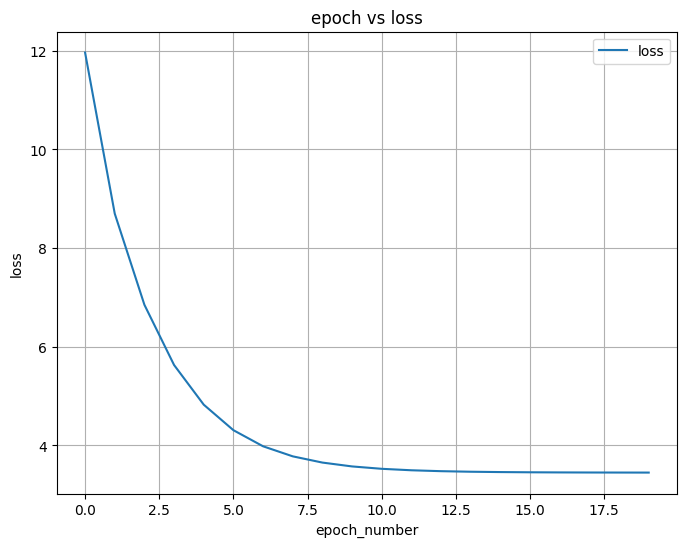

In [78]:
# Vanilla 
%matplotlib inline
import matplotlib.pyplot as plt
epoch = [0, 2,4,6,8, 10,12,14,16,18,20]
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochlist_vanilla,loss_vanilla, label='loss')
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [79]:
def momentum_update(x, y, w_mom, eta_mom,m,  epochs, gamma):
    """Mathematical formula : 
        v_t = gamma* v_t-1 + eta updatedwt
        w_t+1 = wt - vt"""

    loss_val=[]
    epoch_list = []
    for epoch in range(epochs):
        y_pred = []
        epoch_list.append(epoch)

        for i in range(len(x)):
            forward_dict=forward_propagation(X[i], y[i], w)
            y_pred.append(forward_dict['dy_pred'])
            backward=backward_propagation(X[i],y, w_mom,forward_dict)
            # Updating the momentum term and weight accordingly
            m[0]=gamma*m[0]+(1-gamma)*backward["dw1"]
            w[0]=w[0]-eta_mom*m[0]
            m[1]=gamma*m[1]+(1-gamma)*backward["dw2"]
            w[1]=w[1]-eta_mom*m[1]
            m[2]=gamma*m[2]+(1-gamma)*backward["dw3"]
            w[2]=w[2]-eta_mom*m[2]
            m[3]=gamma*m[3]+(1-gamma)*backward["dw4"]
            w[3]=w[3]-eta_mom*m[3]
            m[4]=gamma*m[4]+(1-gamma)*backward["dw5"]
            w[4]=w[4]-eta_mom*m[4]
            m[5]=gamma*m[5]+(1-gamma)*backward["dw6"]
            w[5]=w[5]-eta_mom*m[5]
            m[6]=gamma*m[6]+(1-gamma)*backward["dw7"]
            w[6]=w[6]-eta_mom*m[6]
            m[7]=gamma*m[7]+(1-gamma)*backward["dw8"]
            w[7]=w[7]-eta_mom*m[7]
            m[8]=gamma*m[8]+(1-gamma)*backward["dw9"]
            w[8]=w[8]-eta_mom*m[8]
        loss=mean_squared_error(y,y_pred) 
        loss_val.append(loss)

    return loss_val, epoch_list

In [80]:
eta_mom=.001
m=np.zeros(9)
gamma=0.9
mu, sigma = 0, 0.01 # mean and standard deviation
w_mom = np.random.normal(mu, sigma, 9) # weight intialization

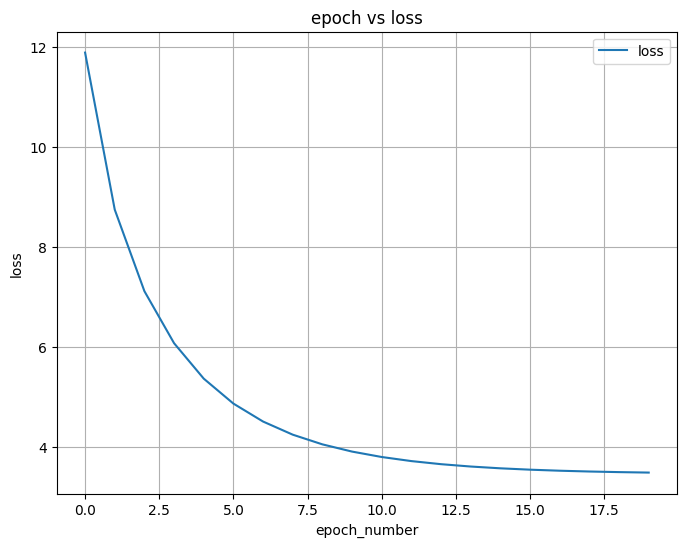

In [81]:
# Momentum

loss_momentum, epochlist_momentum = momentum_update(X, y, w_mom, eta_mom, m,  epochs, gamma)

%matplotlib inline
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochlist_momentum,loss_momentum, label='loss')
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [97]:
def adam_update(X,y,w_adam,epochs, v, eta_adam,m_adam, beta1, beta2, eps_adam):
    loss_val =[]
    epoch_list = []
    for epoch in range(epochs):
        epoch_list.append(epoch)
        y_pred=[]
        for point in range(len(X)):
            forward_dict=forward_propagation(X[point], y[point], w_adam)
            y_pred.append(forward_dict['dy_pred'])
            backward_dict=backward_propagation(X[point],y, w_adam,forward_dict)
            # Updation
            m_adam[0]=beta1*m_adam[0]+(1-beta1)*backward_dict["dw1"]
            mt=m_adam[0]/(1-beta1)
            v[0]=beta2*v[0]+(1-beta2)*math.pow(backward_dict["dw1"],2)
            vt=v[0]/(1-beta2)
            w_adam[0]=w_adam[0]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[1]=beta1*m_adam[1]+(1-beta1)*backward_dict["dw2"]
            mt=m_adam[1]/(1-beta1)
            v[1]=beta2*v[1]+(1-beta2)*math.pow(backward_dict["dw2"],2)
            vt=v[1]/(1-beta2)
            w_adam[1]=w_adam[1]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[2]=beta1*m_adam[2]+(1-beta1)*backward_dict["dw3"]
            mt=m_adam[2]/(1-beta1)
            v[2]=beta2*v[2]+(1-beta2)*math.pow(backward_dict["dw3"],2)
            vt=v[2]/(1-beta2)
            w_adam[2]=w_adam[2]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[3]=beta1*m_adam[3]+(1-beta1)*backward_dict["dw4"]
            mt=m_adam[3]/(1-beta1)
            v[3]=beta2*v[3]+(1-beta2)*math.pow(backward_dict["dw4"],2)
            vt=v[3]/(1-beta2)
            w_adam[3]=w_adam[3]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[4]=beta1*m_adam[4]+(1-beta1)*backward_dict["dw5"]
            mt=m_adam[4]/(1-beta1)
            v[4]=beta2*v[4]+(1-beta2)*math.pow(backward_dict["dw5"],2)
            vt=v[4]/(1-beta2)
            w_adam[4]=w_adam[4]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[5]=beta1*m_adam[5]+(1-beta1)*backward_dict["dw6"]
            mt=m_adam[5]/(1-beta1)
            v[5]=beta2*v[5]+(1-beta2)*math.pow(backward_dict["dw6"],2)
            vt=v[5]/(1-beta2)
            w_adam[5]=w_adam[5]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[6]=beta1*m_adam[6]+(1-beta1)*backward_dict["dw7"]
            mt=m_adam[6]/(1-beta1)
            v[6]=beta2*v[6]+(1-beta2)*math.pow(backward_dict["dw7"],2)
            vt=v[6]/(1-beta2)
            w_adam[6]=w_adam[6]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[7]=beta1*m_adam[7]+(1-beta1)*backward_dict["dw8"]
            mt=m_adam[7]/(1-beta1)
            v[7]=beta2*v[7]+(1-beta2)*math.pow(backward_dict["dw8"],2)
            vt=v[7]/(1-beta2)
            w_adam[7]=w_adam[7]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
            m_adam[8]=beta1*m_adam[8]+(1-beta1)*backward_dict["dw9"]
            mt=m_adam[8]/(1-beta1)
            v[8]=beta2*v[8]+(1-beta2)*math.pow(backward_dict["dw9"],2)
            vt=v[8]/(1-beta2)
            w_adam[8]=w_adam[8]-(eta_adam/(math.sqrt(vt)+eps_adam))*mt
        loss=mean_squared_error(y,y_pred) 
        loss_val.append(loss)

    return loss_val, epoch_list
    

In [98]:
# Refer Stackoverflow for best constant values

eta_adam=.001
m_adam=np.zeros(9)
v=np.zeros(9)
beta1=.9
beta2=0.999
eps_adam=1e-8
mu, sigma = 0, 0.01 # mean and standard deviation
w_adam = np.random.normal(mu, sigma, 9) # weight intialization
epochs = 20

In [99]:
loss_adam, epochlist_adam = adam_update(X,y,w_adam,epochs,v, eta_adam,m_adam, beta1, beta2, eps_adam)


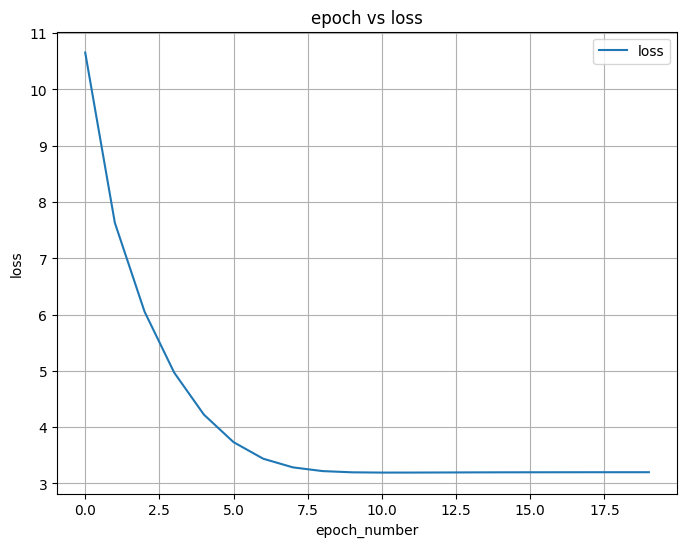

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochlist_adam,loss_adam, label='loss')
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

In [ ]:
#plot the graph between loss vs epochs for all 3 optimizers.


<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>

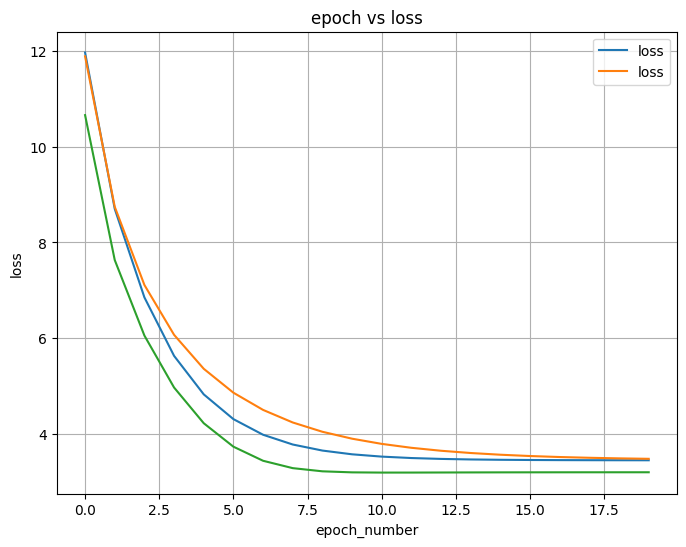

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochlist_vanilla,loss_vanilla, label='loss')
plt.plot(epochlist_momentum, loss_momentum, label='loss')
plt.plot(epochlist_adam, loss_adam)
plt.title("epoch vs loss")
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()

### Reference - 
```
    -GeeksforGeeks
    -AnalyticsVidhya
    -AppliedRoots Notes
    -Stackoverflow
    -Matplotlib documentation
```